<a href="https://colab.research.google.com/github/shaly-ct/AI-and-Machine-Learning/blob/main/EasyVisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).
OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

##**Objective**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.
The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:
Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## **Data Dictionary**
* case_id: ID of each visa application
* continent: Information of continent the employee belongs to
* education_of_employee: Information on the education level of the employee
* has_job_experience: Whether the employee has job experience (Y/N)
* requires_job_training: Whether the employee requires job training (Y/N)
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year the employer's company was established
* region_of_employment: Intended region of employment in the US
* prevailing_wage: Average wage paid to similar workers in the same area
* unit_of_wage: Unit of the prevailing wage (Hourly, Weekly, Monthly, Yearly)
* full_time_position: Whether the position is full-time (Y/N)
* case_status: Indicates if the visa was certified or denied

# **Importing necessary libraries**


In [ ]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install imblearn

In [ ]:

#importing necessary libraries for data manupulation
import pandas as pd
import numpy as np

#Importing libraries for creating charts for EDA
import matplotlib.pyplot as plt
import seaborn as sns

#importing functions for data preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

#importing models from sklearn

#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#importing random forest and bagging classifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

#importing boosting classifiers
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

#importing train test split for splitting the dataset for training and testing
from sklearn.model_selection import train_test_split

#importing metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,f1_score

#importing imputing methods
from sklearn.impute import SimpleImputer

#import classifiers to tune the model
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#import warning to ignore warning
import warnings
warnings.filterwarnings('ignore')

#import modules for over sampling and undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


# **Loading the data**

In [ ]:
#reading the input file and storng to a dataframe
df= pd.read_csv('/content/drive/MyDrive/Python Course/EasyVisa_processesing/EasyVisa.csv')

#copying the df to data to retain the original dataset
data = df.copy()

# **Data Overview**

In [ ]:
#viewing the data to get basic understanding of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
#get the dataset type details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
#get the 5-point summary of the dataset
data.describe(include=['int','float'])

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
#get if there are any null values
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
#getting unique value counts of categorical variables
data.select_dtypes(include=['object']).nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
region_of_employment,5
unit_of_wage,4
full_time_position,2
case_status,2


In [ ]:
#get duplicates if any
data.duplicated().sum()

np.int64(0)

####Observations:
 * There are 9 categorical variable
 * Case ID will not be relevant to the decision tree and will have to be removed
 * The categorical columns will have to undergo data pre-processing using Oridinal encoder or One-hot encoding or label encoding.
 * There are no duplicates and no null


# **Exploratory data analysis**

### Univariate Analysis

In [ ]:
#get numerical and categorical columns for exploratory data analysis
numerical_columns = data.select_dtypes(include=['int','float'])
categorical_columns = data.select_dtypes(include=['object'])

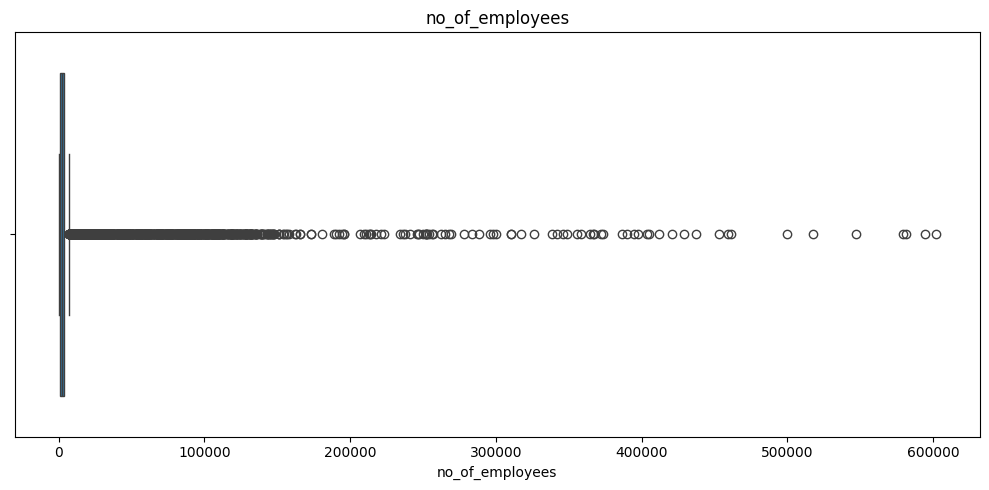

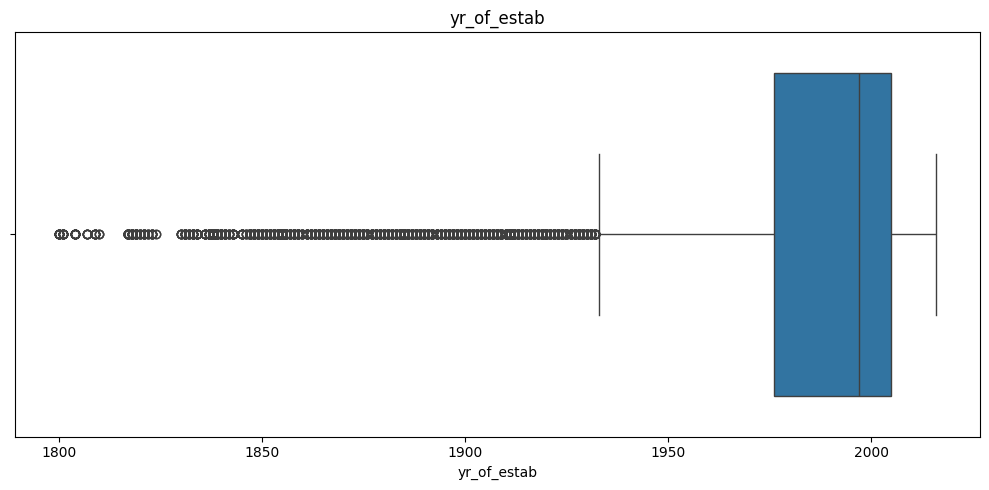

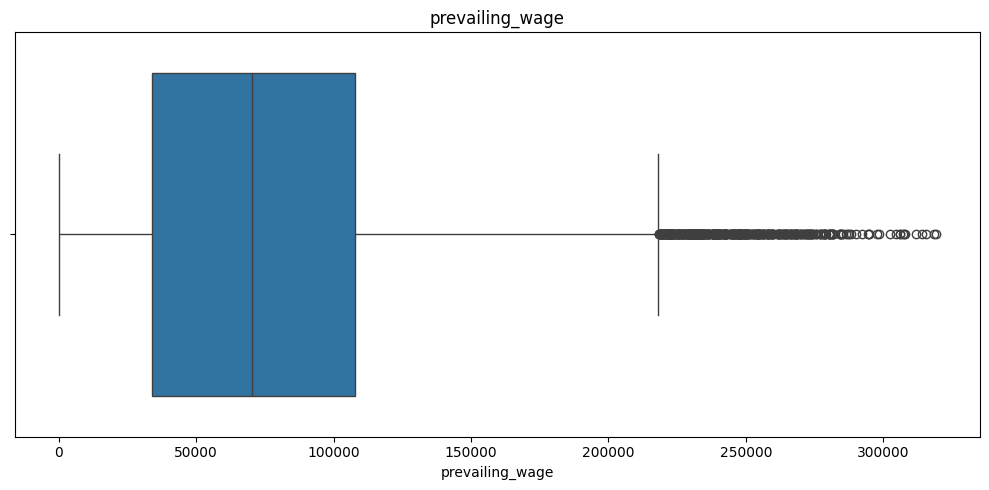

In [ ]:
#create box plot for categorical variables
for i,col in enumerate(numerical_columns):
  plt.figure(figsize=(10,5))
  sns.boxplot(data=data,x=col)
  plt.title(col)
  plt.tight_layout()
  plt.show()

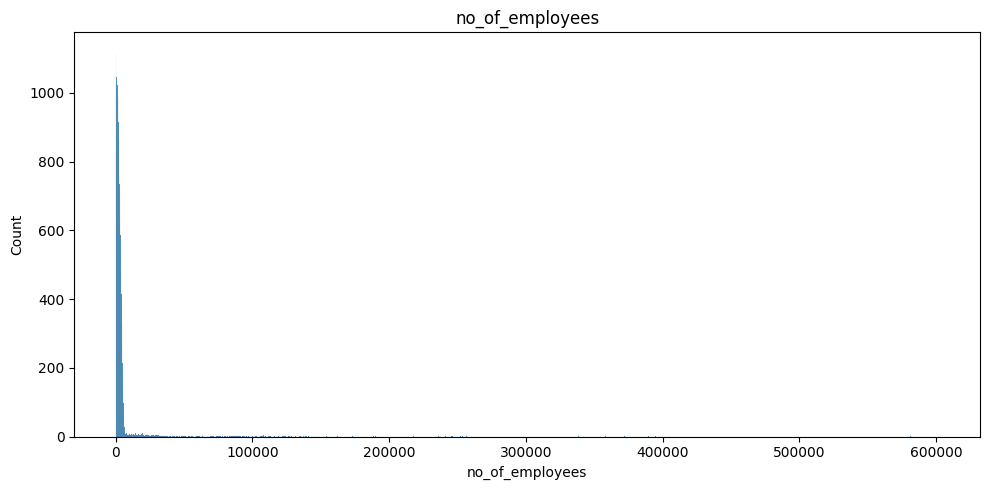

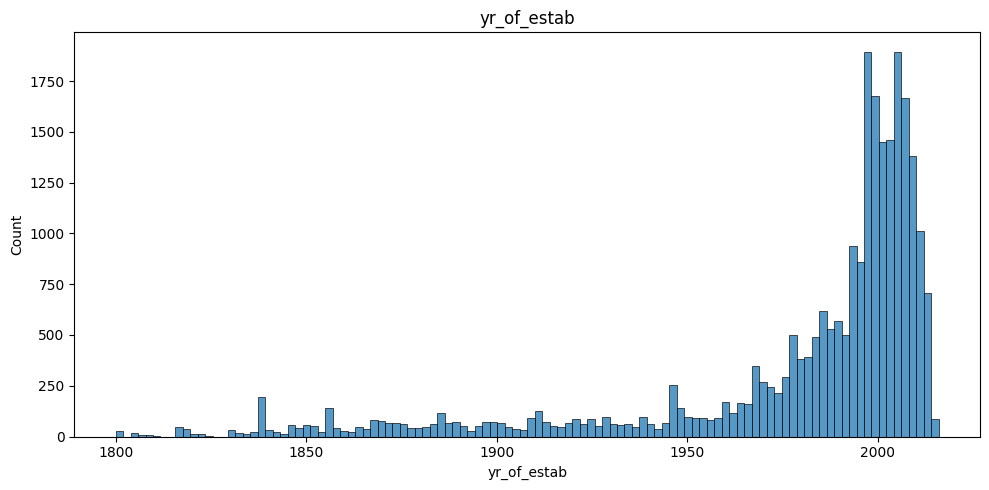

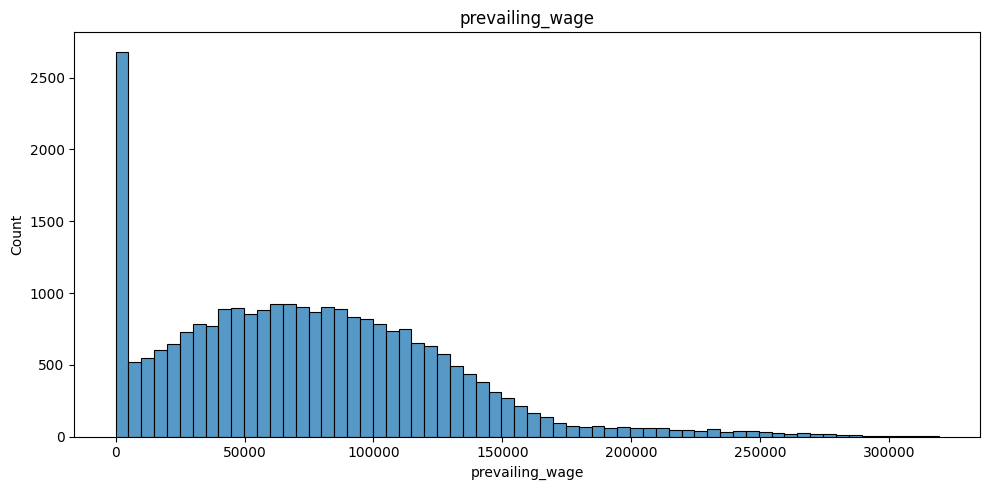

In [ ]:
#create historical plot for numerical variables
for i,col in enumerate(numerical_columns):
  plt.figure(figsize=(10,5))
  sns.histplot(data=data,x=col)
  plt.title(col)
  plt.tight_layout()
  plt.show()

####Observations:
* No. of employees has to many outliers. Many companies have more than 100000 employees.
* Year of establishment is left skewed. More then ~50% of the companies have been established before ~2000.
* Prevailing wage is right skewed. More than 75% employees earn more than $100000

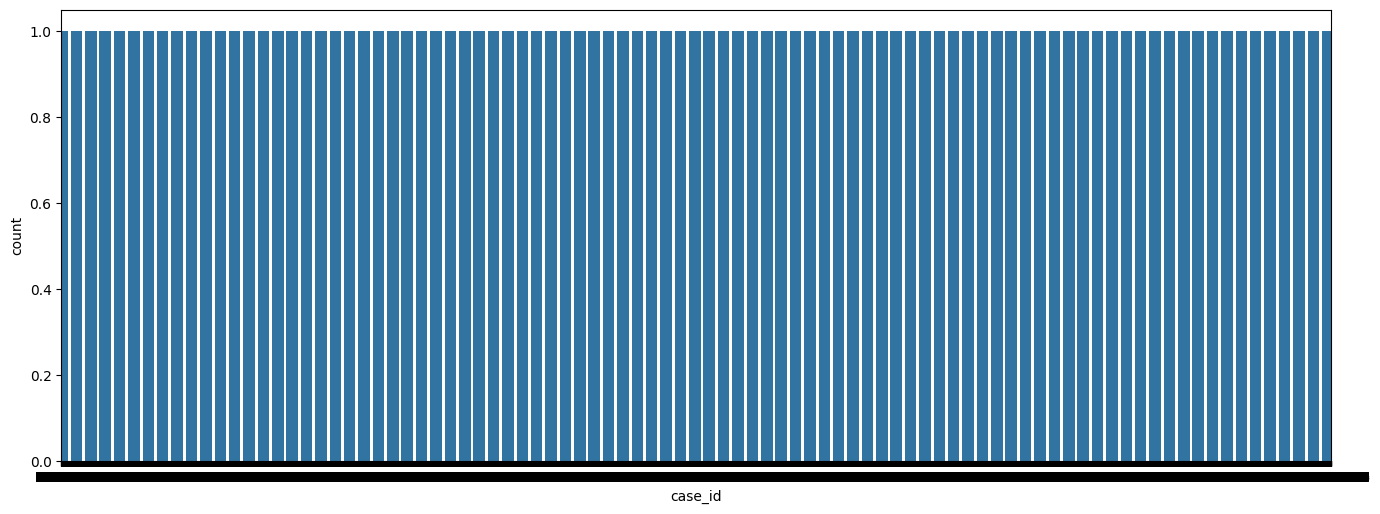

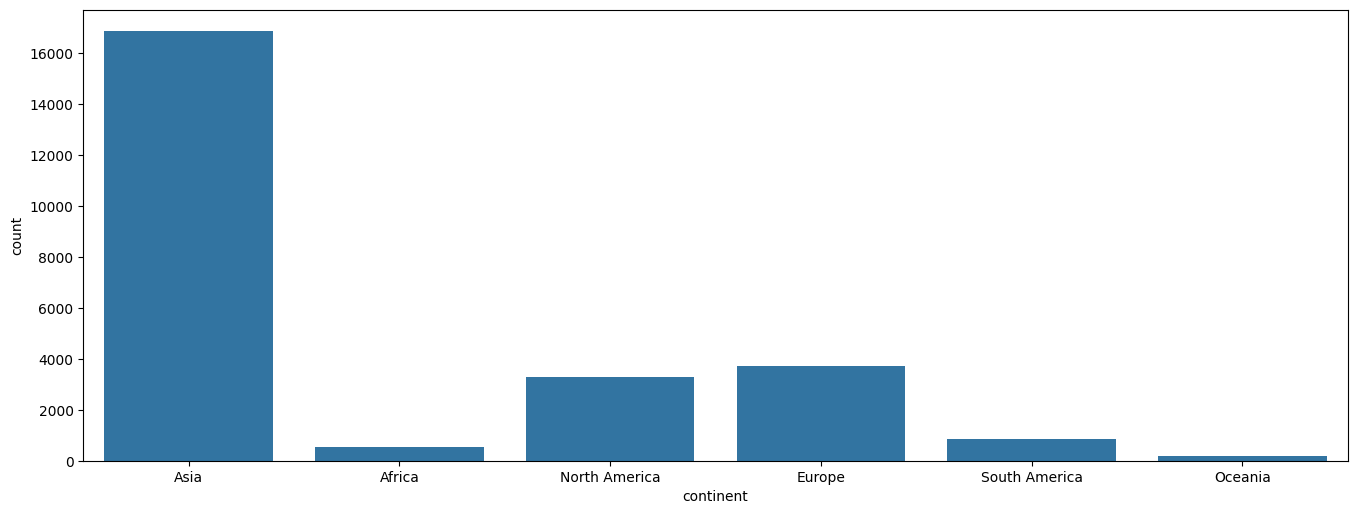

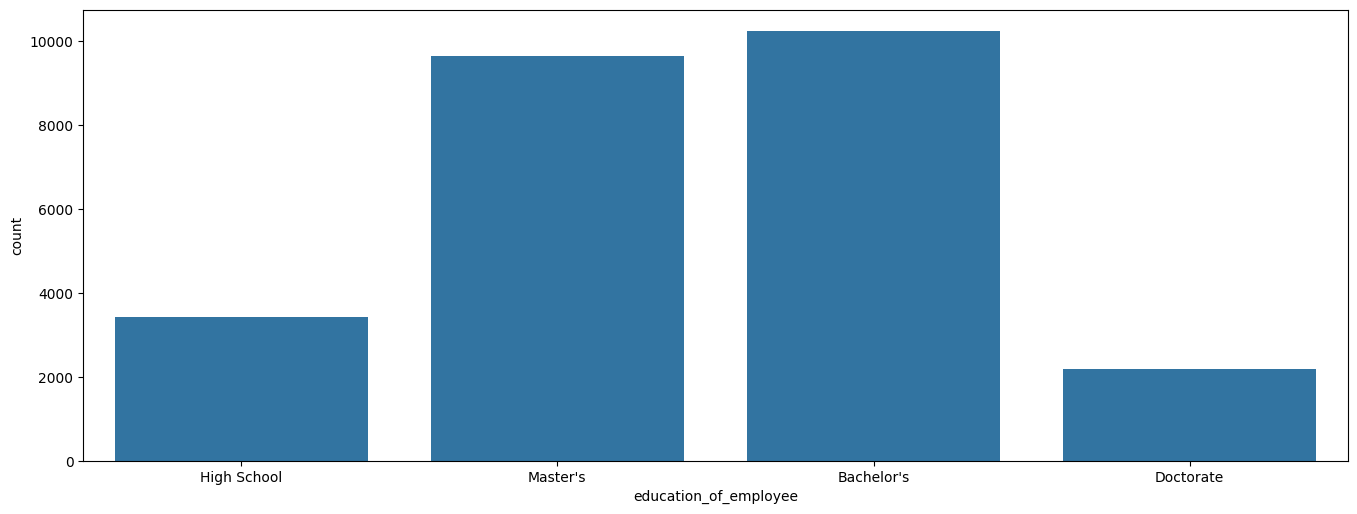

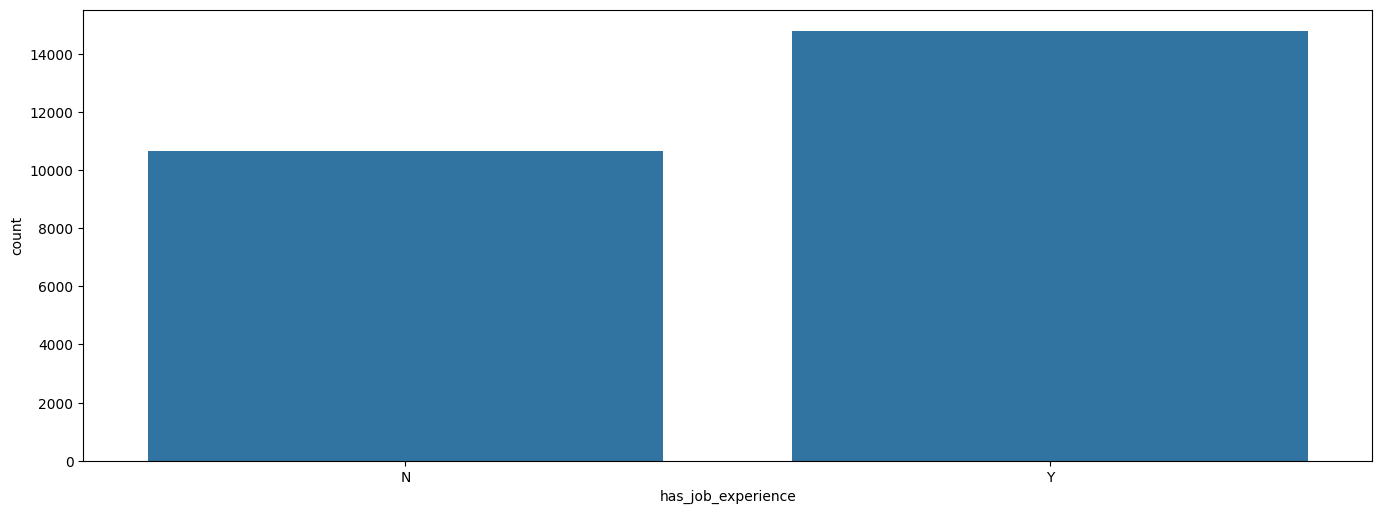

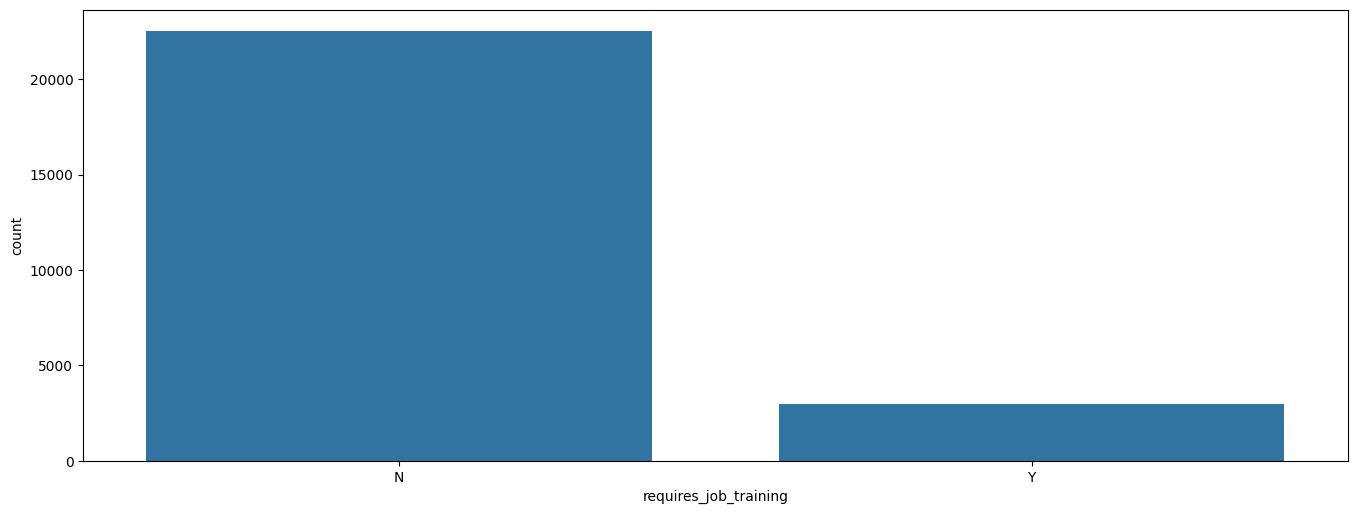

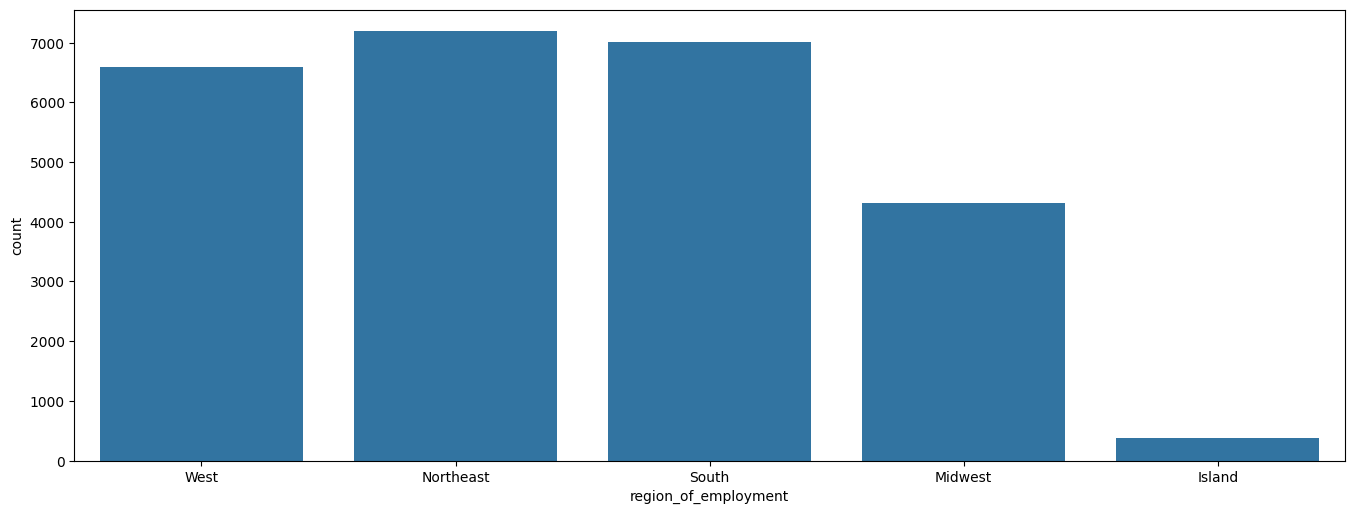

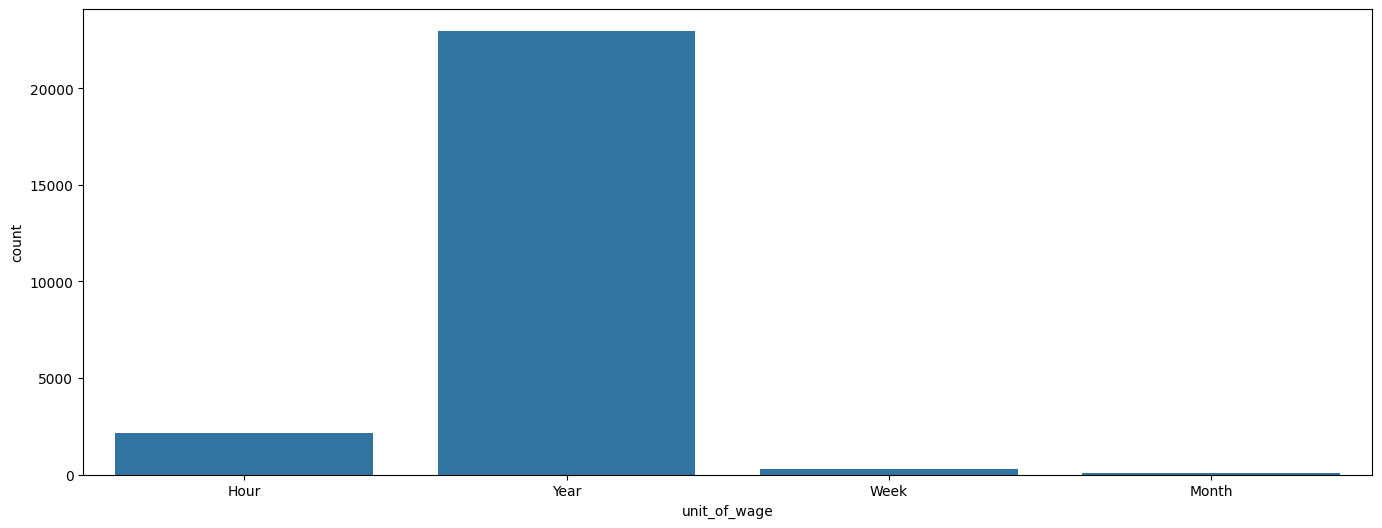

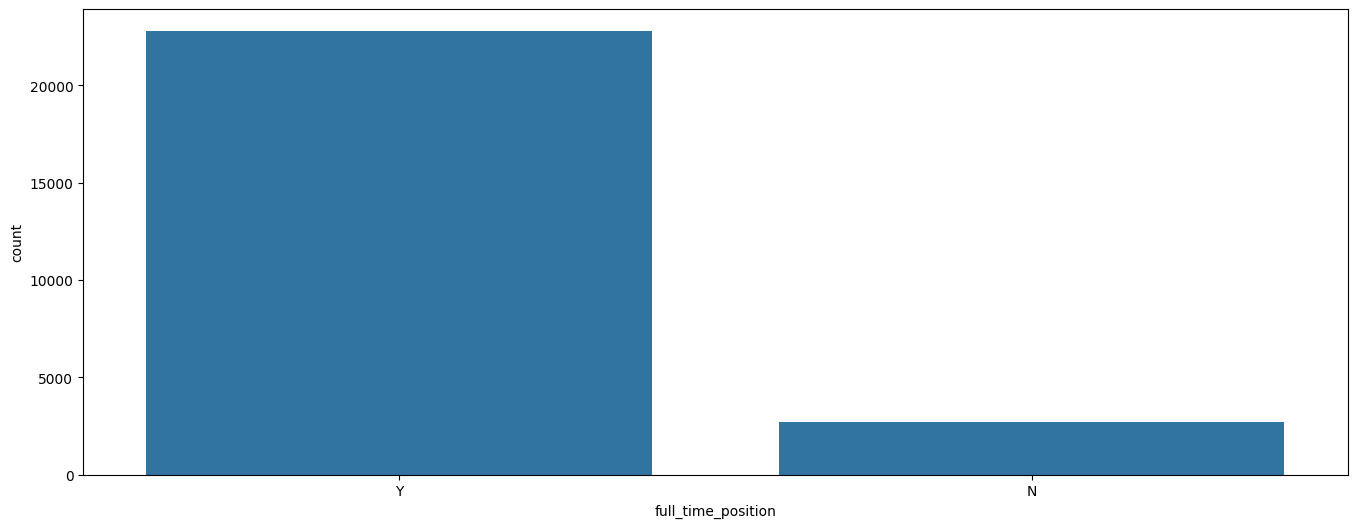

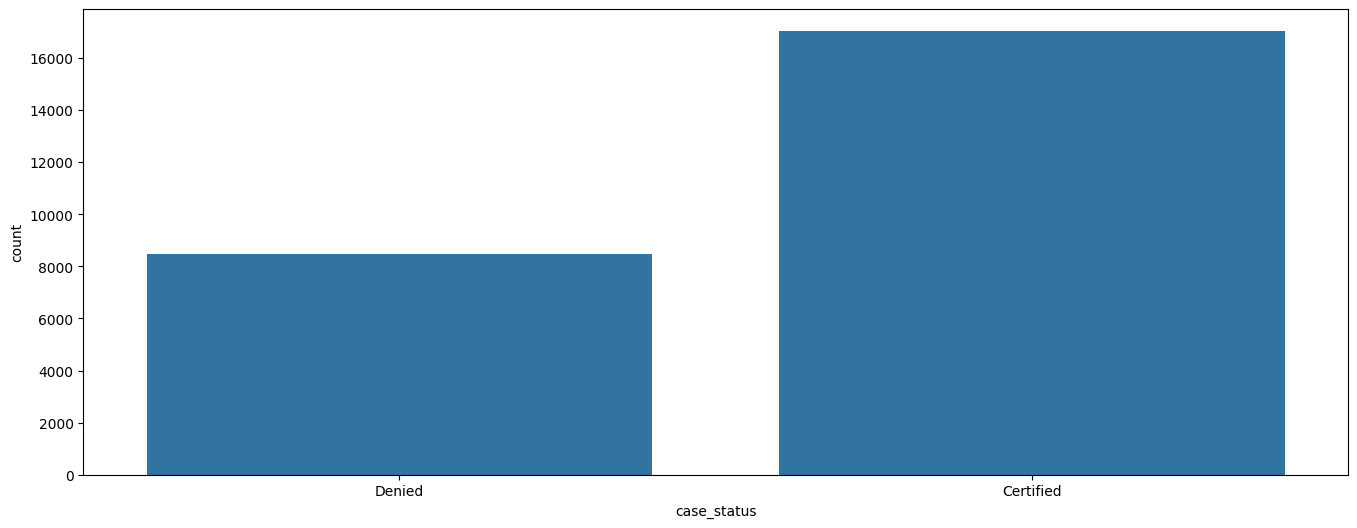

In [ ]:
#generate countplot for categorical columns
for i,col in enumerate(categorical_columns):
  plt.figure(figsize=(40,15))
  plt.subplot(3,3,i+1)
  sns.countplot(data=data,x=col)
  plt.tight_layout()
  plt.show()

####Observations:
* Majority of the applicants are from Asia.
* Majority of the applicants are holding Bachelor's.
* Majority of the applicants have have job experience.
* Majority of the applicants have requires job training.
* Majority of the applicants are employed in Northeast and South.
* Most of the applicants are into full time position.
* Most of the cases are certified.

### Bivariate Analysis

<Axes: >

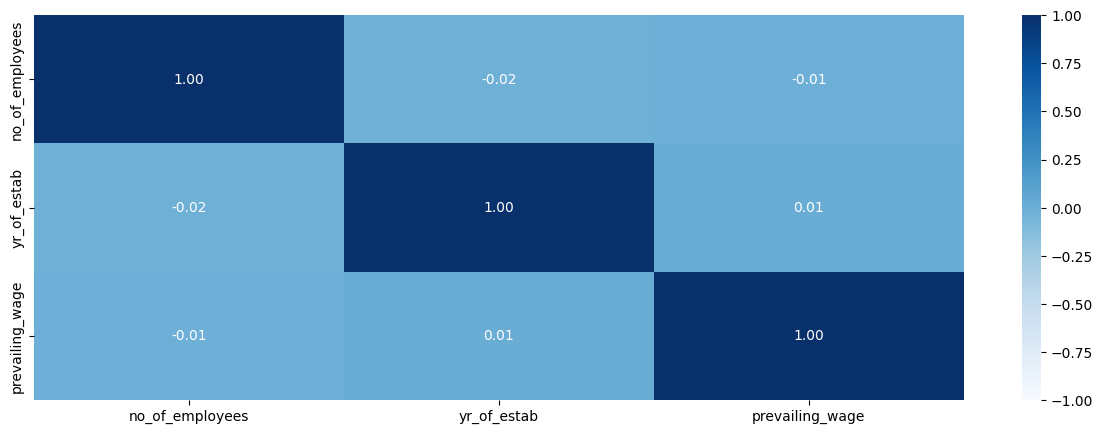

In [ ]:
#generate heat map for numerical variables
features=['no_of_employees','yr_of_estab','prevailing_wage']
plt.figure(figsize=(15,5))
sns.heatmap(data=data[features].corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Blues')


*The features no.of employees, year of establishment and prevailing wages are not correlated.

<Figure size 1500x500 with 0 Axes>

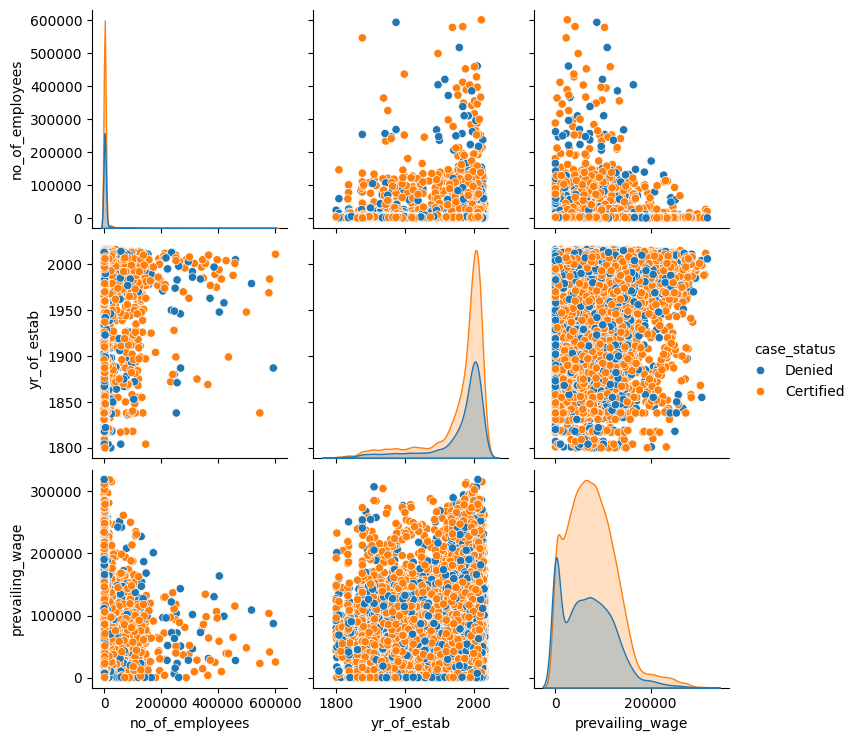

In [ ]:
#generating scatterplot
plt.figure(figsize=(15,5))
sns.pairplot(data=data,vars=features,hue='case_status')
#plt.tight_layout()
plt.show()



* Higher the prevailing wage, more chances of getting certified.
* All the cases of the Employers established before 1900 are denied.
* Employees employed in company with higher number of employees have higher chances are getting cetified.

<Axes: xlabel='continent', ylabel='count'>

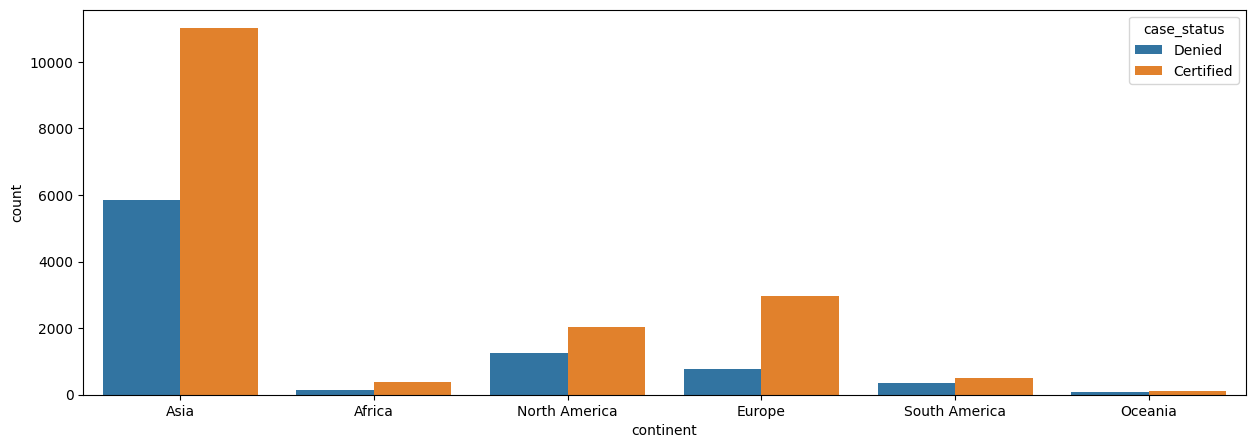

In [ ]:
#generate count plot with hue
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='continent',hue='case_status')

* Asia has the highest number of visa certified as well as denied.
* Oceania has the lowest number of application.
* Oceania has the lowest number of visa certified as we as denied.

<Axes: xlabel='region_of_employment', ylabel='count'>

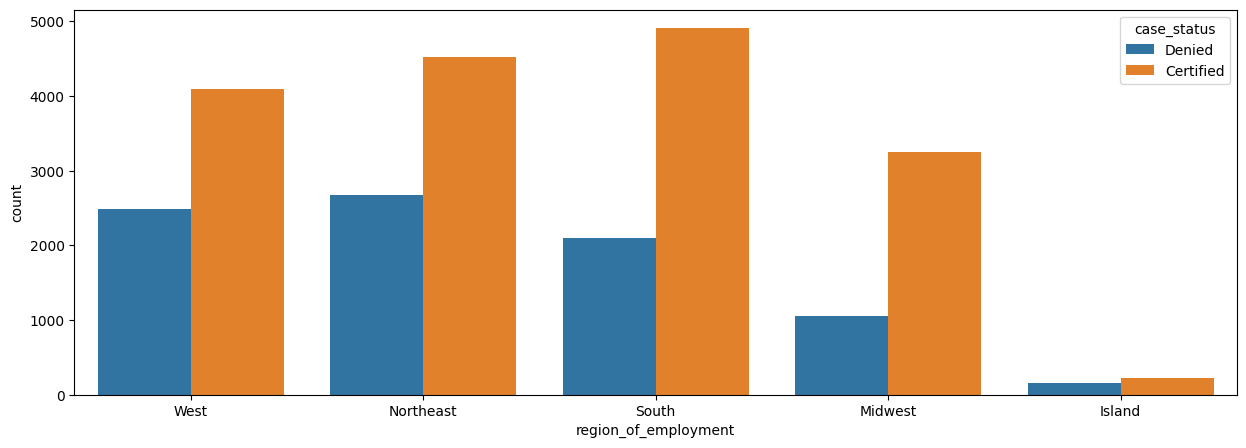

In [ ]:
#generate count plot with hue
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='region_of_employment',hue='case_status')

* Island has the lowest number of applicants.
* South region has the highest number of applicants with visa certified.

<Axes: xlabel='education_of_employee', ylabel='count'>

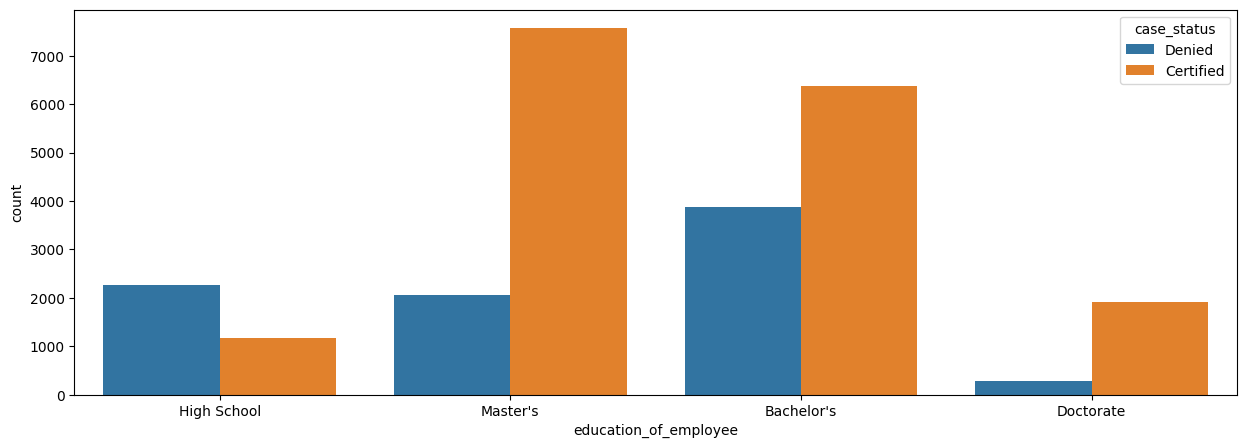

In [ ]:
#generate count plot with hue
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='education_of_employee',hue='case_status')

* Applicants with Doctorate has lowest denial.
* Applicants with Bachelor's has the highest visa denial
* Most of the applicants with Masters degree has received visa certified.

# **Data Pre-processing**

* unit_of_wage feature needs to be encoded using Ordinal encoder.
* education_of_employee needs to be encoded using Ordinal encoder.

In [ ]:
#get unique values of education of employee
data['education_of_employee'].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [ ]:
#Encoding education_of_employee using Ordinal encoder
encoder_education = OrdinalEncoder(categories=[['High School', "Master's", "Bachelor's", 'Doctorate']])
data['education_of_employee'] = encoder_education.fit_transform(data[['education_of_employee']])

In [ ]:
data['unit_of_wage'].unique()

array(['Hour', 'Year', 'Week', 'Month'], dtype=object)

In [ ]:
#Encoding unit_of_wage using Ordinal encoder
encoder_wage = OrdinalEncoder(categories=[['Hour', 'Year', 'Week', 'Month']])
data['unit_of_wage'] = encoder_wage.fit_transform(data[['unit_of_wage']])

In [ ]:
#Replacing Certified and Denied in case_status
data['case_status']=data['case_status'].replace({'Denied':0,'Certified':1})
data['case_status'].head()

,case_status
0,0
1,1
2,0
3,0
4,1


In [ ]:
#Replacing Y and N in has_job_experience,	requires_job_training,full_time_position
data[['has_job_experience',	'requires_job_training','full_time_position']] = data[['has_job_experience',	'requires_job_training','full_time_position']] .replace({'Y':1,'N':0})
data[['has_job_experience',	'requires_job_training','full_time_position']].head()


,has_job_experience,requires_job_training,full_time_position
0,0,0,1
1,1,0,1
2,0,1,1
3,0,0,1
4,1,0,1


In [ ]:
#Let's look at how the dataset looks now
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,0.0,0,0,14513,2007,West,592.2029,0.0,1,0
1,EZYV02,Asia,1.0,1,0,2412,2002,Northeast,83425.6500,1.0,1,1
2,EZYV03,Asia,2.0,0,1,44444,2008,West,122996.8600,1.0,1,0
3,EZYV04,Asia,2.0,0,0,98,1897,West,83434.0300,1.0,1,0
4,EZYV05,Africa,1.0,1,0,1082,2005,South,149907.3900,1.0,1,1


In [ ]:

#dropping case_id as it is not relevant
X=data.drop(['case_id','case_status'],axis=1)
Y=data['case_status']

#get_dummies for Continenr and Region
X=pd.get_dummies(X,columns=X.select_dtypes(include=['object']).columns.tolist(),drop_first=True)
X.astype(float)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,0.0,0.0,0.0,14513.0,2007.0,592.2029,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,2412.0,2002.0,83425.6500,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,0.0,1.0,44444.0,2008.0,122996.8600,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,0.0,0.0,98.0,1897.0,83434.0300,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1082.0,2005.0,149907.3900,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,2.0,1.0,1.0,2601.0,2008.0,77092.5700,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25476,0.0,1.0,0.0,3274.0,2006.0,279174.7900,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25477,1.0,1.0,0.0,1121.0,1910.0,146298.8500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25478,1.0,1.0,1.0,1918.0,1887.0,86154.7700,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#splitting the data for training, validation and testing
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,stratify=Y,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,stratify=y_test,random_state=1)


# **Model Building - Original Data**

### Building functions for model validation and confusion matrix


In [ ]:
#defining the function to compute metrics for model evaluation using sklearn
def get_metrics(model,predictors,target):
      """Function to compute different evaluation metrics for the classifier
      model: classifier
      predictors: independant variables
      target: dependant variable
      """

      #predicting the dependant variables using the model
      predictions = model.predict(predictors)

      #compute different evaluation metrics
      acc = accuracy_score(target, predictions) #compute accuracy
      prec = precision_score(target,predictions) #compute precision
      recall = recall_score(target, predictions) #compute recall
      f1 = f1_score(target,predictions) #compute f1 score

      #put these metrics into a dataframe

      return pd.DataFrame({'Accuracy':acc, "Precision":prec ,"Recall": recall, "f1_score":f1},index=[0]
                                )


In [ ]:
#defining a function to create a confusion matrix

def create_confusion_matrix(model, predictors, target):
  """Function to plot the confusion matrix with percentage
  model: classifier
  predictors: independant variables
  target: dependant variable
  """

  #make predictions using the model
  pred = model.predict(predictors)
  cm = confusion_matrix(target,pred)

  #creating a matrix with percentage
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item)+"\n{0:.2%}".format(item/cm.flatten().sum())
          for item in cm.flatten()

          ]
      ]
  ).reshape(2,2)

  #plotting the confusion matrix
  plt.figure(figsize=(5,3)) #set figure size
  sns.heatmap(data=cm,annot=labels,fmt="")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()




### Decision Tree (sklearn default)


In [ ]:
#Initialising decision tree
dtree1 = DecisionTreeClassifier(random_state=1)

#fitting the model
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

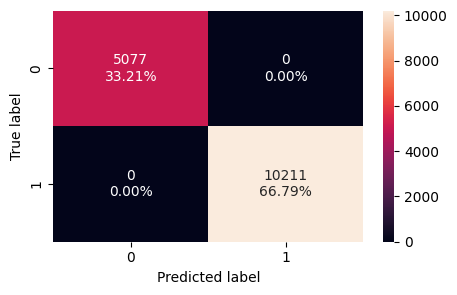

In [ ]:
#plot confusion matrix
create_confusion_matrix(dtree1,X_train,y_train)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(dtree1,X_train,y_train),get_metrics(dtree1,X_test,y_test)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,1.000000,1.000000,1.000000,1.000000
Test,0.664835,0.751857,0.743462,0.747636


* The difference between the training and testing performance is large
* The model is overfitting

### Bagging classifier (sklearn default)


In [ ]:
#Creating a model on bagging classifier

#initialise the bagging estimator. The estimator is decision tree by default
bag_estimator = BaggingClassifier(random_state=1)

#fitting the model
bag_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

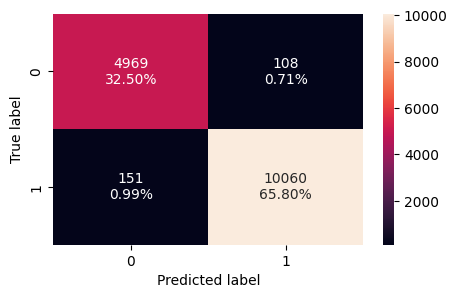

In [ ]:
#plot confusion matrix
create_confusion_matrix(bag_estimator,X_train,y_train)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(bag_estimator,X_train,y_train),get_metrics(bag_estimator,X_test,y_test)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.983059,0.989378,0.985212,0.987291
Test,0.697802,0.778642,0.764913,0.771717


* The difference between the training and testing performance is still large
* The model is overfitting

### Random forest (sklearn default)


In [ ]:
#Creating a model on random forest classifier

#initialise the random forest estimator.
rf_est = RandomForestClassifier(random_state=1)

#fitting the model
rf_est.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

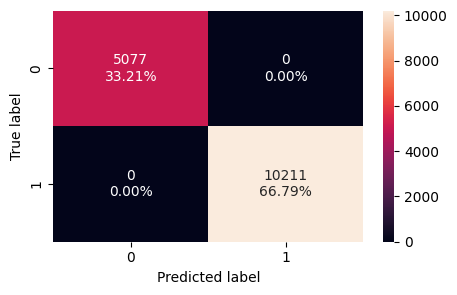

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=rf_est,predictors=X_train,target=y_train)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(rf_est,X_train,y_train),get_metrics(rf_est,X_test,y_test)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,1.000000,1.000000,1.000000,1.000000
Test,0.729592,0.774167,0.840141,0.805806


* The difference between the training and testing performance has comparitively low with other models
* The model is still slightly overfitting

### AdaBoost classifier (sklearn default)


In [ ]:
#Creating a model on ada boost classifier

#initialise the ada boost classifier.
ada_est = AdaBoostClassifier(random_state=1)

#fitting the model
ada_est.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

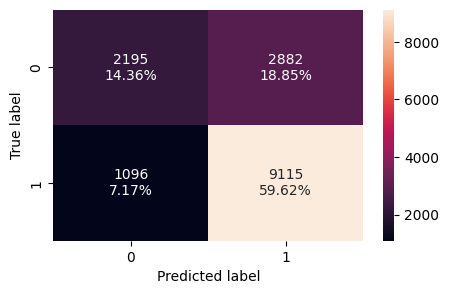

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=ada_est,predictors=X_train,target=y_train)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(ada_est,X_train,y_train),get_metrics(ada_est,X_test,y_test)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.739796,0.759773,0.892665,0.820875
Test,0.738030,0.758888,0.890685,0.819521


* The model has performed similarly in both training and test dataset. The model has generalised well

### Gradient boost classifier (sklearn default)


In [ ]:
#Creating a model on gradient boost classifier

#initialise the gradient boost classifier.
gra_est = GradientBoostingClassifier(random_state=1)

#fitting the model
gra_est.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

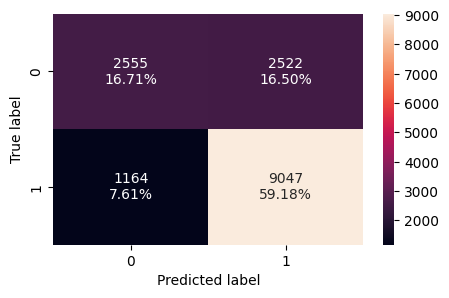

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=gra_est,predictors=X_train,target=y_train)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(gra_est,X_train,y_train),get_metrics(gra_est,X_test,y_test)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.758896,0.782004,0.886005,0.830762
Test,0.749608,0.775732,0.879224,0.824242


* The model has performed similarly in both training and test dataset. The model has generalised well

# **Model Building - Oversampled Data**

In [ ]:
#generating over sampled data
sm = SMOTE(sampling_strategy=0.5,k_neighbors=5,random_state=1)
X_train_over,y_train_over = sm.fit_resample(X_train,y_train)

In [ ]:
#printing the data before and after over sampling

print('Number of entries before oversampling with label [0] :{} '.format(sum(y_train == 0)))
print('Number of entries before oversampling with label [1] :{} '.format(sum(y_train == 1)))

print('Number of entries after oversampling with label [0] :{} '.format(sum(y_train_over == 0)))
print('Number of entries after oversampling with label [1] :{} '.format(sum(y_train_over == 1)))

Number of entries before oversampling with label [0] :5077 
Number of entries before oversampling with label [1] :10211 
Number of entries after oversampling with label [0] :5105 
Number of entries after oversampling with label [1] :10211 


### Decision Tree - oversampled


In [ ]:
#Initialising decision tree
dtree1_over = DecisionTreeClassifier(random_state=1)

#fitting the model
dtree1_over.fit(X_train_over,y_train_over)

DecisionTreeClassifier(random_state=1)

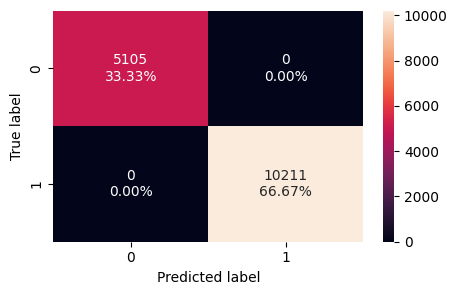

In [ ]:
#plot confusion matrix
create_confusion_matrix(dtree1_over,X_train_over,y_train_over)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(dtree1_over,X_train_over,y_train_over),get_metrics(dtree1_over,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,1.000000,1.000000,1.00000,1.000000
Test,0.659341,0.747919,0.73913,0.743499


* The difference between the training and testing performance is large
* The model is overfitting

### Bagging classifier oversampled


In [ ]:
#Creating a model on bagging classifier

#initialise the bagging estimator. The estimator is decision tree by default
bag_estimator_over = BaggingClassifier(random_state=1)

#fitting the model
bag_estimator_over.fit(X_train_over,y_train_over)

BaggingClassifier(random_state=1)

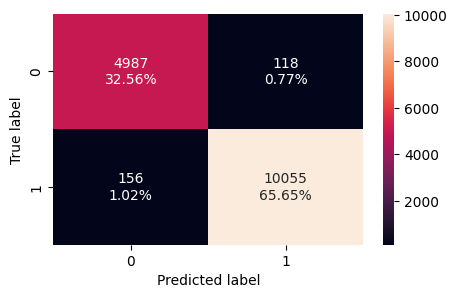

In [ ]:
#plot confusion matrix
create_confusion_matrix(bag_estimator_over,X_train_over,y_train_over)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(bag_estimator_over,X_train_over,y_train_over),get_metrics(bag_estimator_over,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.982110,0.988401,0.984722,0.986558
Test,0.694859,0.769769,0.774971,0.772361


* The difference between the training and testing performance is still large
* The model is still overfitting

### Random forest oversampling

In [ ]:
#Creating a model on random forest classifier

#initialise the random forest estimator.
rf_est_over = RandomForestClassifier(random_state=1)

#fitting the model
rf_est_over.fit(X_train_over,y_train_over)

RandomForestClassifier(random_state=1)

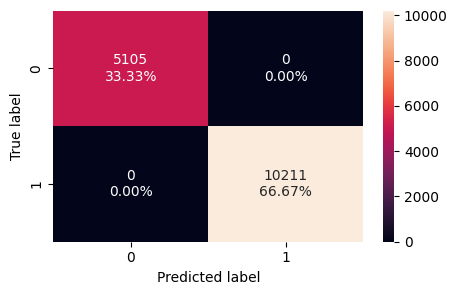

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=rf_est_over,predictors=X_train_over,target=y_train_over)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(rf_est_over,X_train_over,y_train_over),get_metrics(rf_est_over,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,1.000000,1.000000,1.000000,1.000000
Test,0.719192,0.765975,0.834606,0.798819


* The difference between the training and testing performance is large
* The model is still overfitting

### AdaBoost classifier oversampling


In [ ]:
#Creating a model on ada boost classifier

#initialise the ada boost classifier.
ada_est_over = AdaBoostClassifier(random_state=1)

#fitting the model
ada_est_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(random_state=1)

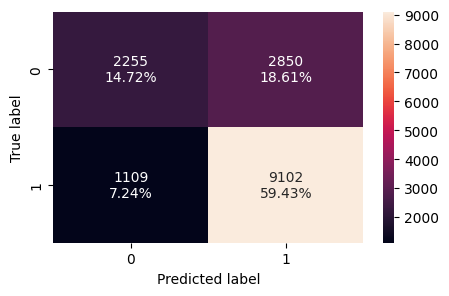

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=ada_est_over,predictors=X_train_over,target=y_train_over)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(ada_est_over,X_train_over,y_train_over),get_metrics(ada_est_over,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.741512,0.761546,0.891392,0.821369
Test,0.729003,0.753065,0.884254,0.813404


* The model has performed similarly in both training and test dataset.
* The model has generalised well

### Gradient boost classifier - oversampling

In [ ]:
#Creating a model on gradient boost classifier

#initialise the gradient boost classifier.
gra_est_over = GradientBoostingClassifier(random_state=1)

#fitting the model
gra_est_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier(random_state=1)

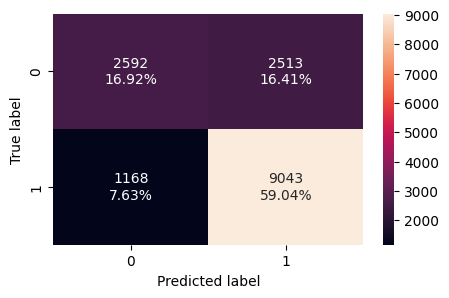

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=gra_est_over,predictors=X_train_over,target=y_train_over)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(gra_est_over,X_train_over,y_train_over),get_metrics(gra_est_over,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.759663,0.782537,0.885614,0.830891
Test,0.741758,0.768243,0.878378,0.819627


* The model has performed similarly in both training and test dataset. The model has generalised well

# **Model Building - Undersampled Data**

In [ ]:
#generating over undersampling data
rus = RandomUnderSampler(sampling_strategy=1,random_state=1)
X_train_under,y_train_under = rus.fit_resample(X_train,y_train)

In [ ]:
#printing the data before and after over sampling

print('Number of entries before undersampling with label [0] :{} '.format(sum(y_train == 0)))
print('Number of entries before undersampling with label [1] :{} '.format(sum(y_train == 1)))

print('Number of entries after undersampling with label [0] :{} '.format(sum(y_train_under == 0)))
print('Number of entries after undersampling with label [1] :{} '.format(sum(y_train_under == 1)))

Number of entries before undersampling with label [0] :5077 
Number of entries before undersampling with label [1] :10211 
Number of entries after undersampling with label [0] :5077 
Number of entries after undersampling with label [1] :5077 


### Decision Tree - undersampling


In [ ]:
#Initialising decision tree
dtree1_under = DecisionTreeClassifier(random_state=1)

#fitting the model
dtree1_under.fit(X_train_under,y_train_under)

DecisionTreeClassifier(random_state=1)

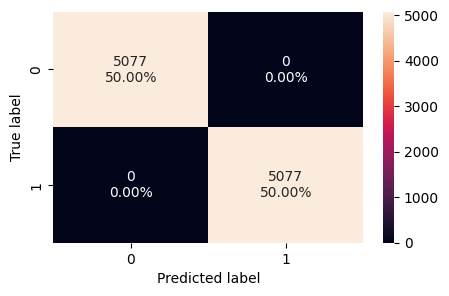

In [ ]:
#plot confusion matrix
create_confusion_matrix(dtree1_under,X_train_under,y_train_under)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(dtree1_under,X_train_under,y_train_under),get_metrics(dtree1_under,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,1.000000,1.00000,1.00000,1.000000
Test,0.624019,0.76458,0.63161,0.691763


* The difference between the training and testing performance is large
* The model is overfitting

### Bagging classifier undersampled


In [ ]:
#Creating a model on bagging classifier

#initialise the bagging estimator. The estimator is decision tree by default
bag_estimator_under = BaggingClassifier(random_state=1)

#fitting the model
bag_estimator_under.fit(X_train_under,y_train_under)

BaggingClassifier(random_state=1)

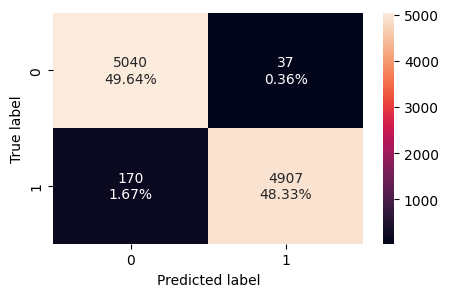

In [ ]:
#plot confusion matrix
create_confusion_matrix(bag_estimator_under,X_train_under,y_train_under)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(bag_estimator_under,X_train_under,y_train_under),get_metrics(bag_estimator_under,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.979614,0.992516,0.966516,0.979343
Test,0.635597,0.802740,0.602526,0.688371


* The difference between the training and testing performance is still large
* The model is still overfitting

### Random forest undersampling

In [ ]:
#Creating a model on random forest classifier

#initialise the random forest estimator.
rf_est_under = RandomForestClassifier(random_state=1)

#fitting the model
rf_est_under.fit(X_train_under,y_train_under)

RandomForestClassifier(random_state=1)

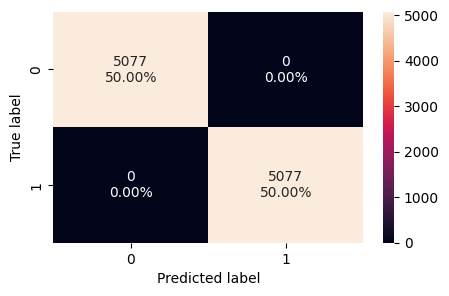

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=rf_est_under,predictors=X_train_under,target=y_train_under)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(rf_est_under,X_train_under,y_train_under),get_metrics(rf_est_under,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,1.000000,1.000000,1.000000,1.000000
Test,0.671115,0.802945,0.672738,0.732097


* The difference between the training and testing performance is large
* The model is still overfitting

### AdaBoost classifier undersampling


In [ ]:
#Creating a model on ada boost classifier

#initialise the ada boost classifier.
ada_est_under = AdaBoostClassifier(random_state=1)

#fitting the model
ada_est_under.fit(X_train_under,y_train_under)

AdaBoostClassifier(random_state=1)

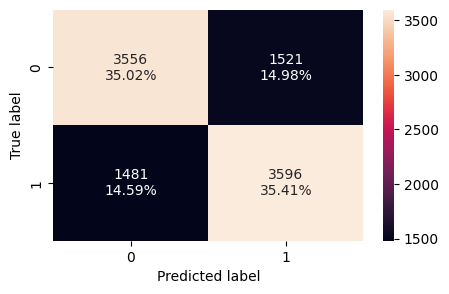

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=ada_est_under,predictors=X_train_under,target=y_train_under)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(ada_est_under,X_train_under,y_train_under),get_metrics(ada_est_under,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.704353,0.702756,0.708292,0.705513
Test,0.695251,0.811511,0.708284,0.756392


* The model has performed almost similarly in both training and test dataset.


### Gradient boost classifier - undersampling

In [ ]:
#Creating a model on gradient boost classifier

#initialise the gradient boost classifier.
gra_est_under = GradientBoostingClassifier(random_state=1)

#fitting the model
gra_est_under.fit(X_train_under,y_train_under)

GradientBoostingClassifier(random_state=1)

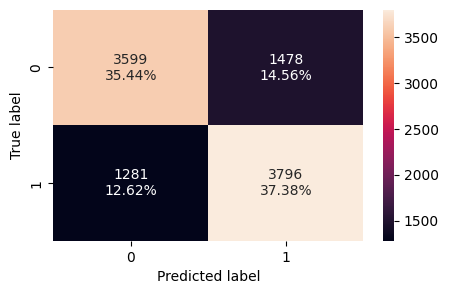

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=gra_est_under,predictors=X_train_under,target=y_train_under)

In [ ]:
#evaluating the model for training

pd.concat([get_metrics(gra_est_under,X_train_under,y_train_under),get_metrics(gra_est_under,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.728284,0.719757,0.747686,0.733456
Test,0.704670,0.809990,0.728848,0.767280


* The model has performed similarly in both training and test dataset. The model has generalised well

# **Hyperparameter Tuning**

From all the above models,
We will choose,

In [ ]:
#creating a dataframe to compare all the models
pd.concat(
[
# Metrics for original data
get_metrics(dtree1,X_train,y_train),get_metrics(dtree1,X_test,y_test),
get_metrics(bag_estimator,X_train,y_train),get_metrics(bag_estimator,X_test,y_test),
get_metrics(rf_est,X_train,y_train),get_metrics(rf_est,X_test,y_test),
get_metrics(ada_est,X_train,y_train),get_metrics(ada_est,X_test,y_test),
get_metrics(gra_est,X_train,y_train),get_metrics(gra_est,X_test,y_test),

# Metrics for oversampled data (using validation set for evaluation)
get_metrics(dtree1_over,X_train_over,y_train_over),get_metrics(dtree1_over,X_val,y_val),
get_metrics(bag_estimator_over,X_train_over,y_train_over),get_metrics(bag_estimator_over,X_val,y_val),
get_metrics(rf_est_over,X_train_over,y_train_over),get_metrics(rf_est_over,X_val,y_val), # Corrected variable name
get_metrics(ada_est_over,X_train_over,y_train_over),get_metrics(ada_est_over,X_val,y_val),
get_metrics(gra_est_over,X_train_over,y_train_over),get_metrics(gra_est_over,X_val,y_val),

# Metrics for undersampled data (using validation set for evaluation)
get_metrics(dtree1_under,X_train_under,y_train_under),get_metrics(dtree1_under,X_val,y_val),
get_metrics(bag_estimator_under,X_train_under,y_train_under),get_metrics(bag_estimator_under,X_val,y_val),
get_metrics(rf_est_under,X_train_under,y_train_under),get_metrics(rf_est_under,X_val,y_val),
get_metrics(ada_est_under,X_train_under,y_train_under),get_metrics(ada_est_under,X_val,y_val),
get_metrics(gra_est_under,X_train_under,y_train_under),get_metrics(gra_est_under,X_val,y_val)
],ignore_index=True).set_index(pd.Index([
    # Labels for original data
    'decision tree original training','decision tree original test',
    'bagging estimator original training','bagging estimator original test',
    'random forest estimator original training','random forest estimator original test',
    'Adaboost estimator original training','Adaboost estimator original test',
    'Gradient boost estimator original training','Gradient boost estimator original test',

    # Labels for oversampled data
    'decision tree oversampling training','decision tree oversampling validation',
    'bagging estimator oversampling training','bagging estimator oversampling validation',
    'random forest estimator oversampling training','random forest estimator oversampling validation',
    'Adaboost estimator oversampling training','Adaboost estimator oversampling validation',
    'Gradient boost estimator oversampling training','Gradient boost estimator oversampling validation',

    # Labels for undersampled data
    'decision tree undersampling training','decision tree undersampling validation',
    'bagging estimator undersampling training','bagging estimator undersampling validation',
    'random forest estimator undersampling training','random forest estimator undersampling validation',
    'Adaboost estimator undersampling training','Adaboost estimator undersampling validation',
    'Gradient boost estimator undersampling training','Gradient boost estimator undersampling validation'
    ]))

,Accuracy,Precision,Recall,f1_score
decision tree original training,1.000000,1.000000,1.000000,1.000000
decision tree original test,0.664835,0.751857,0.743462,0.747636
bagging estimator original training,0.983059,0.989378,0.985212,0.987291
bagging estimator original test,0.697802,0.778642,0.764913,0.771717
random forest estimator original training,1.000000,1.000000,1.000000,1.000000
random forest estimator original test,0.729592,0.774167,0.840141,0.805806
Adaboost estimator original training,0.739796,0.759773,0.892665,0.820875
Adaboost estimator original test,0.738030,0.758888,0.890685,0.819521
Gradient boost estimator original training,0.758896,0.782004,0.886005,0.830762
Gradient boost estimator original test,0.749608,0.775732,0.879224,0.824242


* Based on f1 score, Gradient boost original estimator has the highest score.
* The next highest score is Adaboost original estimator and random forest original estimator
* These 3 classifiers have also generalised well.
* So, choosing these three models for hyper parameter tuning

### Random forest original with Grid search cv

In [ ]:
### initialising Random forest
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50,75,100],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#run the grid search
rf_tuned = GridSearchCV(rf_estimator_tuned,parameters,scoring=acc_scorer, cv=3,verbose=2, n_jobs=-1)

#fit the model
rf_tuned.fit(X_train,y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = rf_tuned.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


RandomForestClassifier(class_weight='balanced_subsample', max_depth=np.int64(3),
                       max_features=np.float64(0.30000000000000004),
                       max_samples=np.float64(0.3), min_impurity_decrease=0.001,
                       min_samples_leaf=np.int64(7), random_state=1)

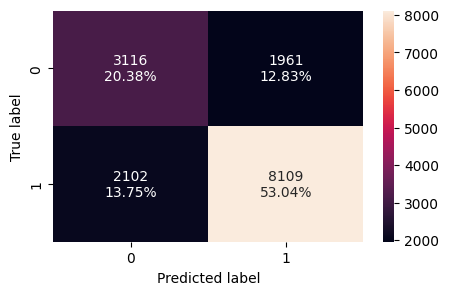

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=rf_tuned,predictors=X_train,target=y_train)

In [ ]:
#evaluating the model for training and testing

pd.concat([get_metrics(rf_tuned,X_train,y_train),get_metrics(rf_tuned,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.734236,0.805263,0.794144,0.799665
Test,0.724686,0.793316,0.794947,0.794131


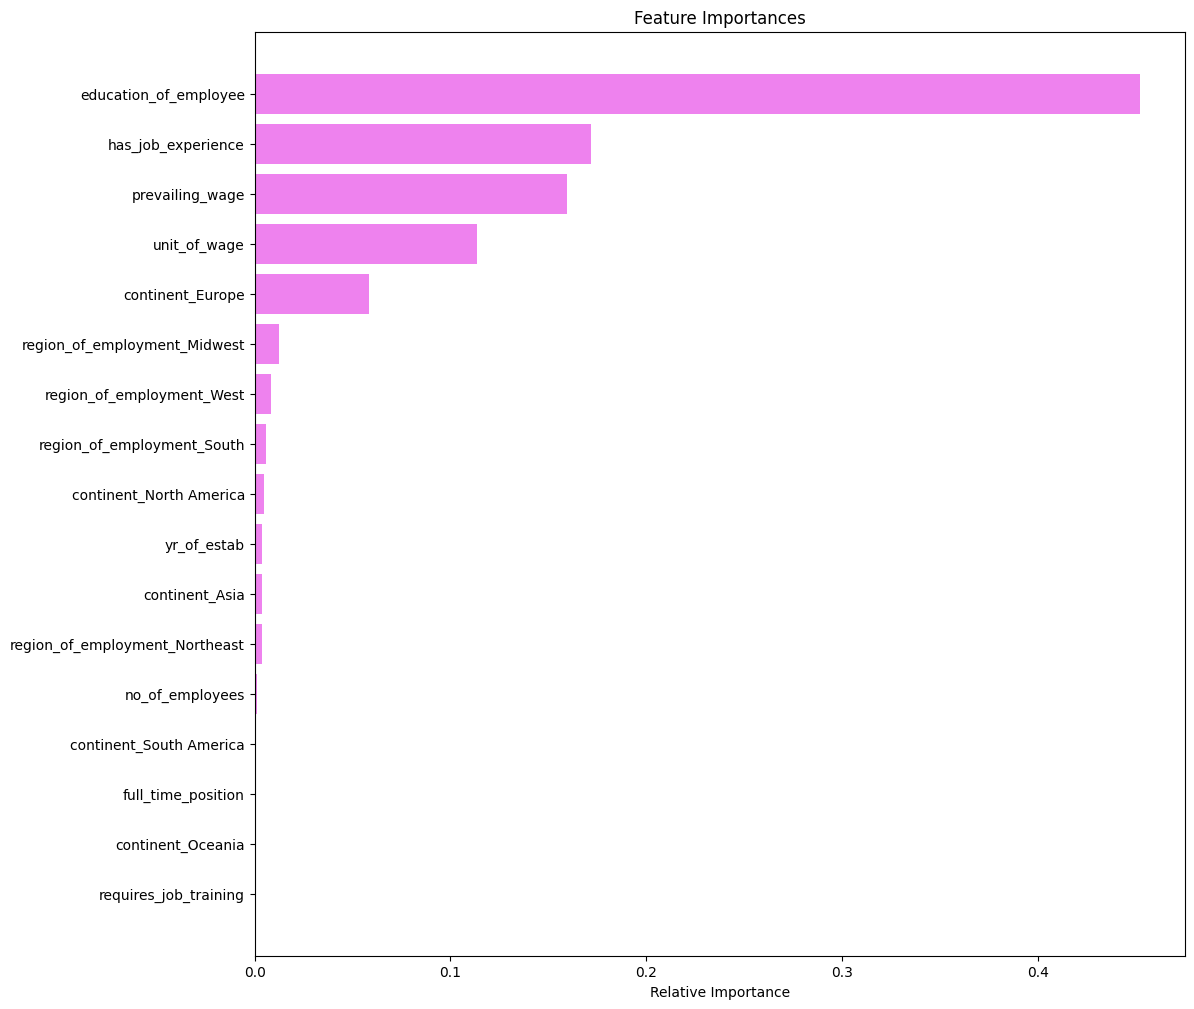

In [ ]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Random forest original with Randomised search cv

In [ ]:
### initialising Random forest
rf_estimator_randomcv = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#run randomised CV\
rf_rcv = RandomizedSearchCV(rf_estimator_randomcv,parameters,scoring=acc_scorer,cv=5,n_jobs=-1,verbose=2)

#fit the model
rf_rcv.fit(X_train,y_train)

#print the best model parameter
rf_rcf_best = rf_rcv.best_estimator_

rf_rcf_best.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomForestClassifier(class_weight='balanced_subsample', max_depth=np.int64(3),
                       max_features=np.float64(0.2),
                       max_samples=np.float64(0.6000000000000001),
                       min_impurity_decrease=0.002,
                       min_samples_leaf=np.int64(8), n_estimators=150,
                       random_state=1)

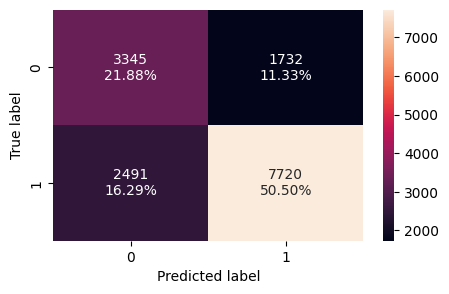

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=rf_rcf_best,predictors=X_train,target=y_train)

In [ ]:
#evaluating the model for training and testing

pd.concat([get_metrics(rf_rcf_best,X_train,y_train),get_metrics(rf_rcf_best,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.723770,0.816758,0.756047,0.785231
Test,0.716641,0.804537,0.760576,0.781939


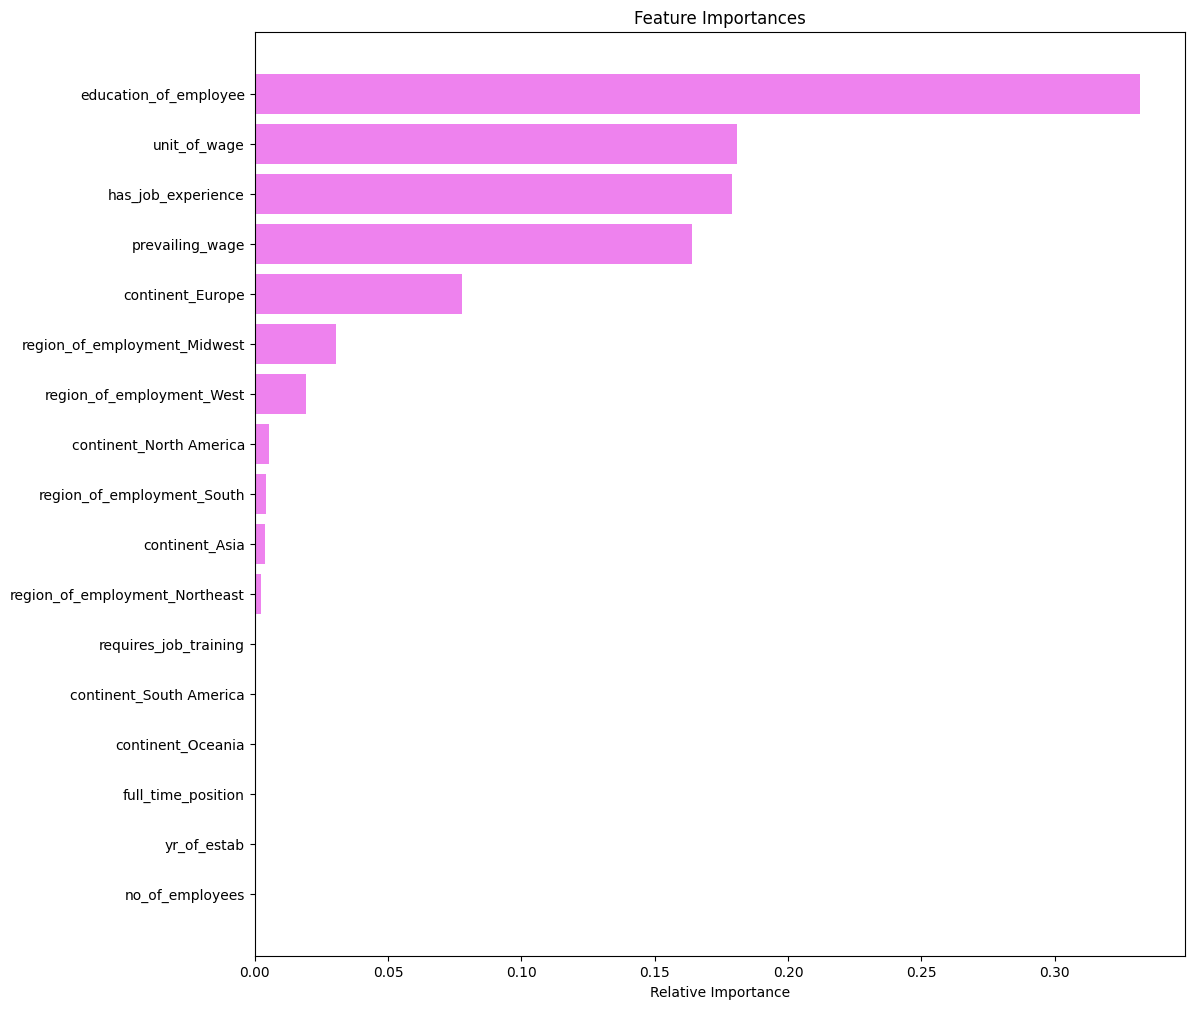

In [ ]:
importances = rf_rcf_best.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Adaboost original with Grid search cv

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters
parameters = {
    "estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=np.float64(0.1), n_estimators=np.int64(30),
                   random_state=1)

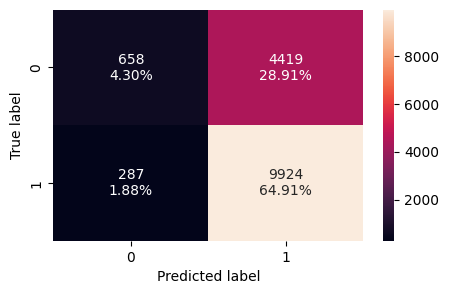

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=abc_tuned,predictors=X_train,target=y_train)

In [ ]:
#evaluating the model for training and testing

pd.concat([get_metrics(abc_tuned,X_train,y_train),get_metrics(abc_tuned,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.692177,0.691905,0.971893,0.808341
Test,0.692896,0.692003,0.973561,0.808983


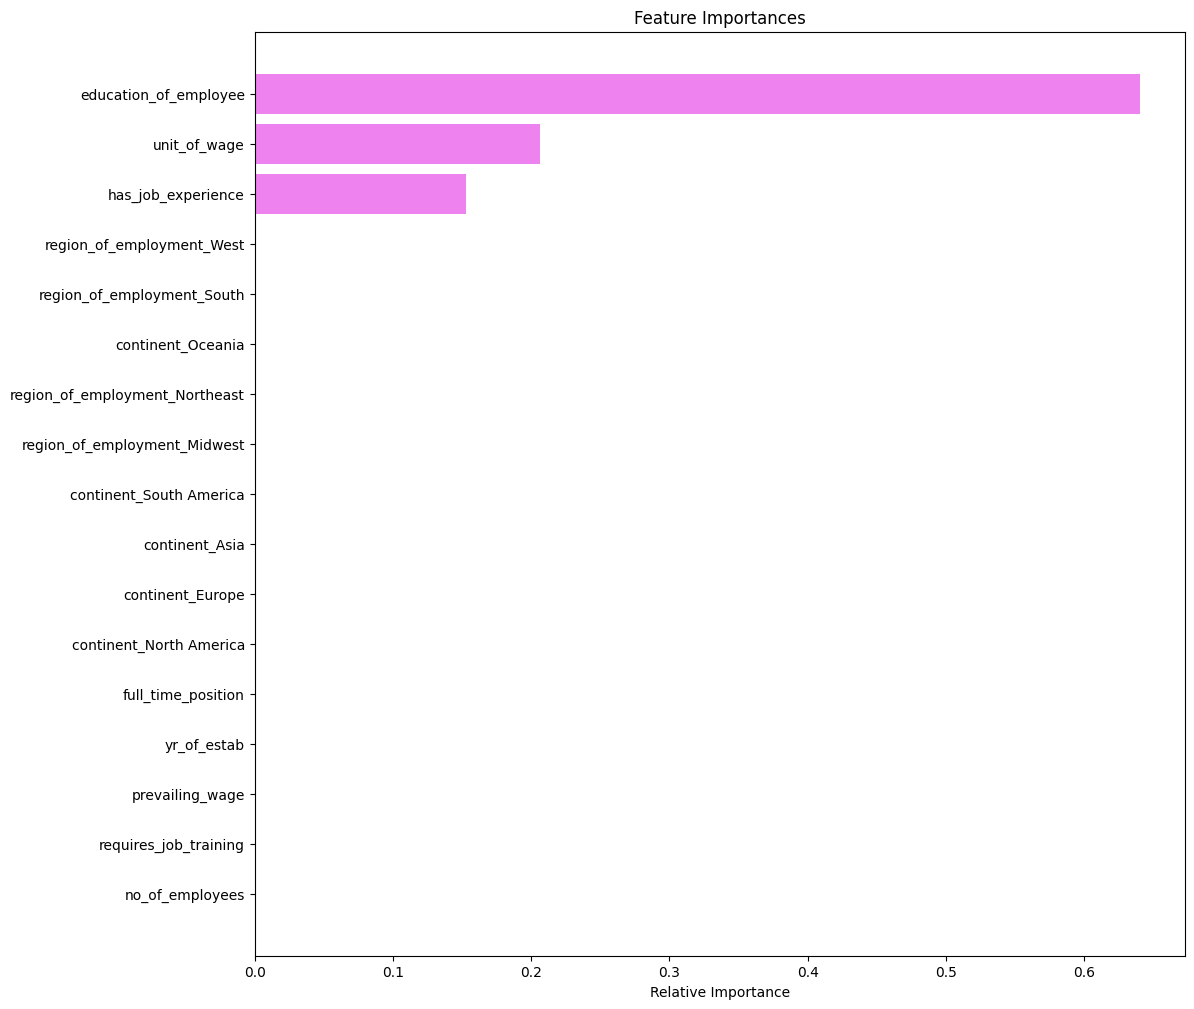

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient boost original with Grid search cv

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=0.9)

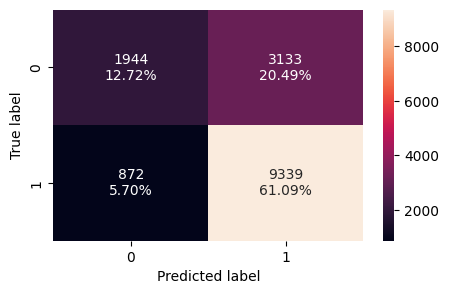

In [ ]:
#plot confusion matrix
create_confusion_matrix(model=gbc_tuned,predictors=X_train,target=y_train)

In [ ]:
#evaluating the model for training and testing

pd.concat([get_metrics(gbc_tuned,X_train,y_train),get_metrics(gbc_tuned,X_val,y_val)],ignore_index=True).set_index(pd.Index(['Training','Test']))

,Accuracy,Precision,Recall,f1_score
Training,0.738030,0.748797,0.914602,0.823436
Test,0.724686,0.739297,0.908049,0.815030


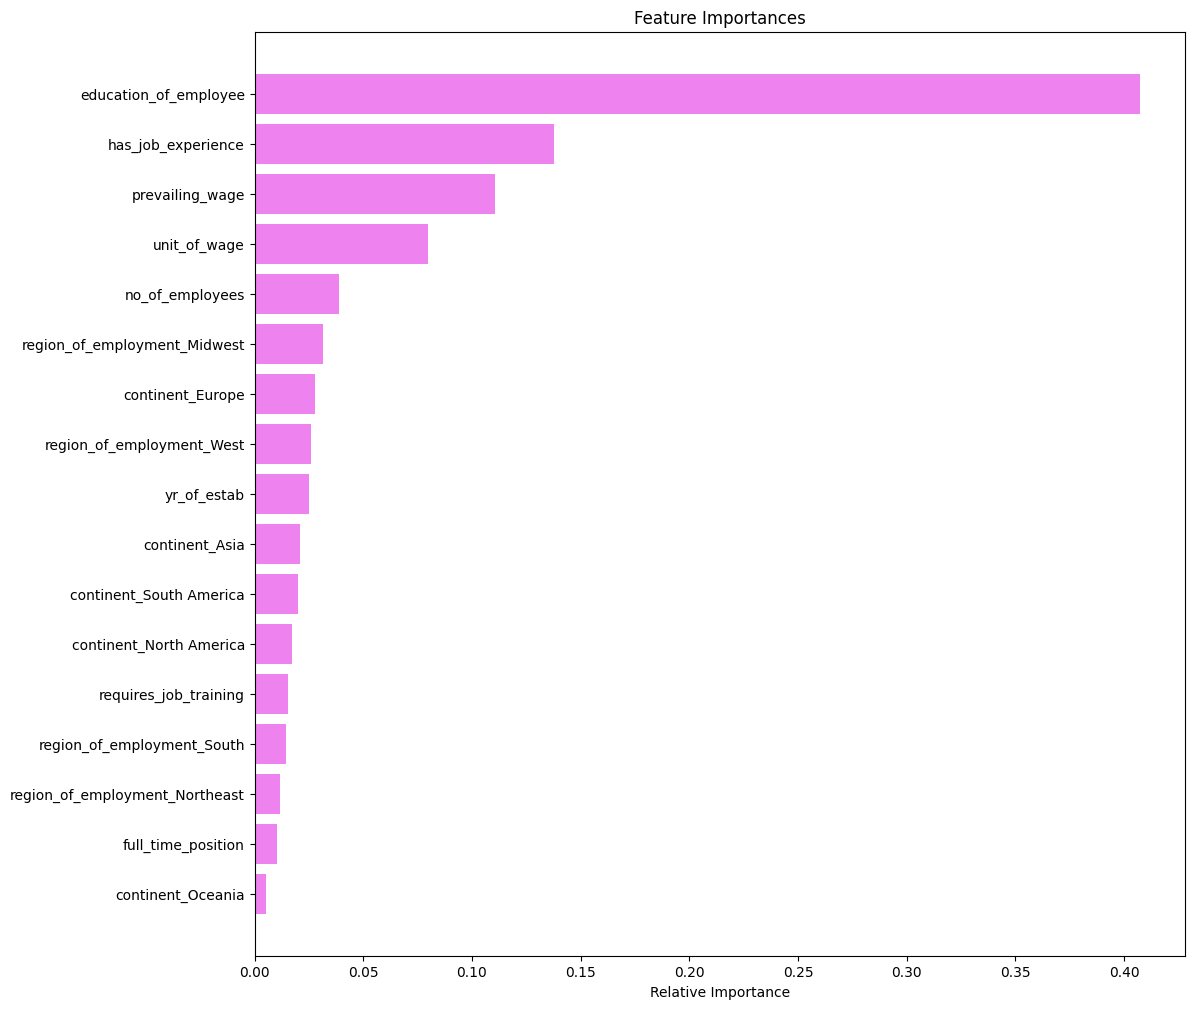

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NOTE: Did not run Randomised CV for Adaboost and Gradient boost classifier due to execution constraint.

# **Actionable Insights & Recommendations**

###### **Conclusion**

* Based on models using Original data, Decision Tree, Bagging, and Random Forest showed significant overfitting, with much higher scores on the training set than on the test set. Their performance on the test set was relatively poor. AdaBoost and Gradient Boosting performed well on the test set and the scores were closer to their training scores, indicating better generalization. They achieved high scores across all metrics.

* Based on models using Oversampling of data, Oversampling did not significantly improve the generalization of the Decision Tree, Bagging, or Random Forest models, which still exhibited overfitting.AdaBoost and Gradient Boosting performed well on the test set and the scores were closer to their training scores, indicating better generalization. They achieved high scores across all metrics.

* Based on models using Oversampled data, Oversampling did not significantly improve the generalization of the Decision Tree, Bagging, or Random Forest models, which still exhibited overfitting.AdaBoost and Gradient Boosting on the oversampled data maintained their good performance on the validation set.

* Applying hyperparameter tuning helped the Random Forest model improve its performance and reduce the gap between training and validation scores, but it still didn't reach the performance levels of AdaBoost or Gradient Boosting.Tuning further optimized the performance of AdaBoost and Gradient Boosting, maintaining their high scores on the validation set.

**Final Model Selection**

* The adaboost after tuned has significantlly shown very high perfomance espeicially with ~97 recall score and ~80 f1 score. This model has surely generalised well. This shall be our final model.





###Business recommendation

* Prioritize Applications with High Prediction of Certification: Based on the analysis, certain factors significantly influence the likelihood of visa certification. OFLC can develop a system to flag applications that have a high probability of being certified based on the model's predictions. This can help in fast-tracking these applications, improving efficiency and reducing processing time for clearly eligible candidates.

* Focus Resources on Applications with High Prediction of Denial: Similarly, applications predicted to be denied can be reviewed more closely and efficiently. This allows OFLC to allocate resources effectively to applications that require more scrutiny and potentially communicate with employers or applicants about potential issues proactively.

* Tailor Recommendations for Applicants: For applicants whose visa status is less certain based on the model, EasyVisa can provide tailored recommendations. For instance, if the model suggests that a higher education level or more job experience would increase the chances of certification, EasyVisa can advise applicants on these factors.

* Target Recruitment Efforts: Companies struggling to find local talent can use the insights from this analysis to understand which applicant profiles (e.g., education level, continent, region of employment) are more likely to be certified. This can help them refine their recruitment strategies for foreign workers.

* Review Prevailing Wage Requirements: The analysis showed that prevailing wage is a significant factor. OFLC could consider reviewing the prevailing wage standards to ensure they accurately reflect market conditions and don't unfairly penalize employers or applicants.

* Investigate Factors Contributing to Denial for High-Risk Groups: The analysis revealed that certain groups (e.g., applicants with Bachelor's degrees, those from Asia) have a higher number of denials. OFLC and EasyVisa could conduct further investigation into the specific reasons for denial within these groups to identify if there are systemic issues or if additional guidance or documentation is needed.

* Monitor and Update the Model Regularly: The visa application landscape can change over time. It's crucial to monitor the model's performance on new data and periodically retrain or update it to ensure its accuracy and relevance.

